<div class='status' style='background-color: #183a4b; color: white; padding-top: 4px; padding-bottom: 4px; padding-left: 20px; padding-right: 20px; border-radius: 10px; font-family: Arial, sans-serif; font-size: 26px; display: inline-block; text-align: center; box-shadow: 0px 3px 4px rgba(0, 0, 0, 0.5);'><b>AI MedReview</B> - Thematic Analysis Clusters </div>

## Loading Libraries

In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

/Users/janduplessis/.pyenv/versions/aimed/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from ai_medreview.data import load_google_sheet

<div class='status' style='background-color: #f5c244; color: white; padding-top: 2px; padding-bottom: 2px; padding-left: 7px; padding-right: 7px; border-radius: 6px; font-family: Arial, sans-serif; font-size: 18px; display: inline-block; text-align: center; box-shadow: 0px 3px 4px rgba(0, 0, 0, 0.2);'><b>Loading</b> dataset</div>

In [16]:
data = pd.read_csv('../ai_medreview/data/data.csv')

In [17]:
data.head()

,time,rating,free_text,do_better,surgery,pcn,sentiment_free_text,sentiment_score_free_text,sentiment_do_better,sentiment_score_do_better,...,emotion_free_text,emotion_do_better,free_text_PER,do_better_PER,campaing_id,logic,campaign_rating,campaign_freetext,free_text_qa,do_better_qa
0,2024-01-01 10:51:00,Very good,NaN,NaN,Scarsdale-Medical-Centre,Brompton-Health-PCN,neutral,0.000000,neutral,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-01 15:20:00,Very good,NaN,NaN,Scarsdale-Medical-Centre,Brompton-Health-PCN,neutral,0.000000,neutral,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-01 17:47:00,Very good,NaN,NaN,Earls-Court-Surgery,Brompton-Health-PCN,neutral,0.000000,neutral,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-02 07:58:00,Good,PERSON was amazing kind and helpful The recept...,NaN,Scarsdale-Medical-Centre,Brompton-Health-PCN,positive,0.937987,neutral,0.0,...,admiration,NaN,['Denise'],NaN,NaN,NaN,NaN,NaN,"{'score': 0.034968744963407516, 'start': 36, '...",NaN
4,2024-01-02 10:44:00,Very good,NaN,NaN,Scarsdale-Medical-Centre,Brompton-Health-PCN,neutral,0.000000,neutral,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
free_text = data[['free_text']].dropna()
do_better = data[['do_better']].dropna()

In [26]:
free_text_list =  free_text['free_text'].to_list()
do_better_list = do_better['do_better'].to_list()

In [83]:
surg_list = data['surgery'].unique()

In [88]:
list(surg_list)

['Scarsdale-Medical-Centre',
 'Earls-Court-Surgery',
 'Stanhope-Mews-Surgery',
 'The-Chelsea-Practice',
 'Health-Partners-at-Violet-Melchett',
 'Knightsbridge-Medical-Centre',
 'Emperors-Gate-Health-Centre',
 'Earls-Court-Medical-Centre',
 'The-Abingdon-Medical-Practice',
 'The-Good-Practice',
 'Royal-Hospital-Chelsea',
 'Oakwood-Surgery-1',
 'Demo-Surgery-2',
 'Demo-Surgery-1',
 'Kensington-Park-Medical-Centre',
 nan,
 'Pendleside-Medical-Practice',
 'Slaidburn-Country-Practice',
 'The-Castle-Medical-Group',
 'Sabden-and-Whalley-Medical-Group',
 'Fitznells-Manor-Surgery',
 'Cox-Lane-Surgery',
 'Oakengates',
 'Malinslee',
 'Madeley',
 'Leegomery',
 'Lawley',
 'Hadley',
 'The-Old-Cottage-Hospital',
 'Stoneleigh-Medical-Centre',
 'Waterfield-House-Surgery']

In [ ]:
sorted

In [91]:
# Load the model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
embeddings = model.encode(free_text_list)

In [92]:
# Define the number of clusters
num_clusters = 30

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings)


In [90]:
import hdbscan

# Apply HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=2)  # Adjust min_cluster_size as needed
clusters = clusterer.fit_predict(embeddings)


In [93]:
# Create a DataFrame with feedback and cluster labels
df = pd.DataFrame({'feedback': free_text_list, 'cluster': clusters})


In [94]:
df

,feedback,cluster
0,PERSON was amazing kind and helpful The recept...,19
1,We have had Very good service from the NHS reg...,24
2,The staff polite feel welcome and comfortable ...,29
3,I ve been with the Surgery for years Good serv...,17
4,All people who works there Very kind team work...,25
...,...,...
6728,Very responsive quick appointments Good doctor...,1
6729,The diagnosis on my kids is consistently wrong...,14
6730,Everything i expect from a chemist,5
6731,I got the help I need it right away,2


In [95]:
# Print feedback for each cluster
for cluster in sorted(df['cluster'].unique()):
    print(f"Cluster {cluster}:")
    print(df[df['cluster'] == cluster]['feedback'].values)
    print()


Cluster 0:
['I was not able to get through to the surgery since last week I tried several times but just couldnâ€™t connect Finally I had to go to A E and the nurse there was able to get through itâ€™s appalling that the receptionists donâ€™t answer Communication is key for a Good service very disappointing'
 'Being No 1 in the Q when the surgery is not open and thinking you will be speaking to somebody I know itâ€™s nothing to do with the staff there however the internal system with the telephone can be highly confusing I believe Iâ€™m very lucky to have Scarsdale medical Centre as my surgery over the last 23 years Iâ€™ve never been severely llet down by any of your staff and if there has been a problem with staff itâ€™s been noted recognised and they are replaced Often I hear from friends and family they tell me what They have to go through With GPâ€™s I realise how lucky I am With Thanks Leo Scott Francis'
 'Always available prompt to respond I trust the doctors at the surgery'
 'I 

In [96]:
def get_top_words(cluster_text, n_top=5):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(cluster_text)
    feature_names = vectorizer.get_feature_names_out()
    summed_tfidf = tfidf_matrix.sum(axis=0).A1
    top_indices = summed_tfidf.argsort()[-n_top:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    return top_words

# Get top words for each cluster (skip noise if using HDBSCAN)
for cluster in sorted(df['cluster'].unique()):
    if cluster != -1:  # Skip noise for HDBSCAN
        cluster_text = df[df['cluster'] == cluster]['feedback']
        top_words = get_top_words(cluster_text)
        print(f"Cluster {cluster} top words: {', '.join(top_words)}")


Cluster 0 top words: surgery, appointment, gp, doctor, time
Cluster 1 top words: care, good, service, excellent, clinic
Cluster 2 top words: good, help, thank, helpful, problem
Cluster 3 top words: prescription, medication, prescriptions, repeat, pharmacist
Cluster 4 top words: practice, efficient, run, staff, friendly
Cluster 5 top words: good, happy, time, great, think
Cluster 6 top words: nurse, person, friendly, helpful, kind
Cluster 7 top words: gp, appointment, time, appointments, good
Cluster 8 top words: doctor, doctors, time, face, care
Cluster 9 top words: test, blood, results, tests, appointment
Cluster 10 top words: person, dr, doctor, helpful, good
Cluster 11 top words: doctor, dr, time, helpful, person
Cluster 12 top words: professional, friendly, person, time, good
Cluster 13 top words: receptionist, helpful, receptionists, friendly, doctors
Cluster 14 top words: person, treatment, consultation, dr, health
Cluster 15 top words: time, wait, waiting, long, seen
Cluster 16 

/Users/janduplessis/.pyenv/versions/aimed/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


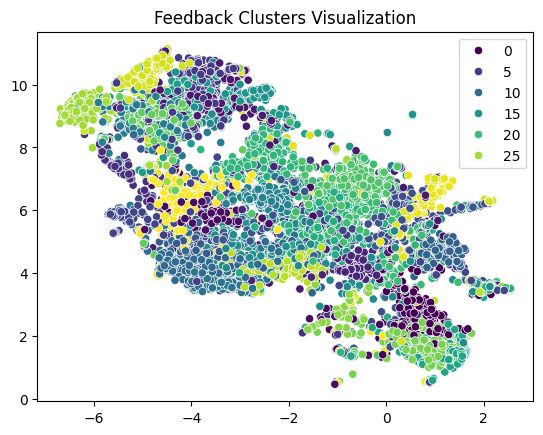

In [97]:
# Reduce dimensions with UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embeddings = reducer.fit_transform(embeddings)

# Plot the clusters
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], hue=clusters, palette='viridis')
plt.title("Feedback Clusters Visualization")
plt.show()


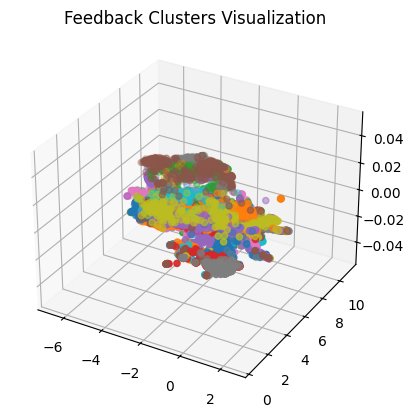

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Setup 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
unique_clusters = np.unique(clusters)

# Plot all points
for cluster in unique_clusters:
    idx = clusters == cluster
    ax.scatter(umap_embeddings[idx, 0], 
               umap_embeddings[idx, 1], 
)

# Annotate 50% of clusters
num_to_annotate = max(1, len(unique_clusters) // 2)  # At least 1 cluster
clusters_to_annotate = random.sample(list(unique_clusters), num_to_annotate)

for cluster in clusters_to_annotate:
    idx = clusters == cluster
    centroid = umap_embeddings[idx].mean(axis=0)  # Average x, y, z
    top_words = get_top_words(df[df['cluster'] == cluster]['feedback'], n_top=3)
    annotation = ', '.join(top_words)
    ax.text(centroid[0], centroid[1], centroid[1], annotation, fontsize=8)

ax.set_title("Feedback Clusters Visualization")
plt.show()

# DO Better Clustering

In [37]:
# Load the model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
embeddings = model.encode(do_better_list)

In [60]:
# Define the number of clusters
num_clusters = 30

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings)

In [39]:
import hdbscan

# Apply HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=2)  # Adjust min_cluster_size as needed
clusters = clusterer.fit_predict(embeddings)

In [61]:
# Create a DataFrame with feedback and cluster labels
df = pd.DataFrame({'feedback': do_better_list, 'cluster': clusters})

In [62]:
df

,feedback,cluster
0,Having a coffee machine so you can have a drin...,24
1,Due to the number of illnesses I suffer from s...,17
2,I was told the wait for a new prescription was...,13
3,None at all going to the surgery feels like be...,2
4,Customer Service training for staff members,27
...,...,...
2286,More accurate investigation instead of rushing...,17
2287,Not that i can think of and is reasoabld,14
2288,more information about hormones and HRT treatm...,13
2289,It would be good to have led lights or plants ...,26


In [63]:
# Print feedback for each cluster
for cluster in sorted(df['cluster'].unique()):
    print(f"Cluster {cluster}:")
    print(df[df['cluster'] == cluster]['feedback'].values)
    print()

Cluster 0:
['Blood sample went through to lab ok'
 'On time and fully prepared to do blood pressure reading'
 'Quicker feed back after visits blood test and other tests The often very long period if there is a recall for an evaluation means that as a patient you do not know if the results have been lost are positive or negative A quick short notification that a result has been uploaded to the patient record would be enough sent via email as a new documents or sms and the patient can then check online rather than call to enquire'
 'In my instance the nurse had problems getting blood from the back of the hand 2nd test and I needed to walk round the corner to another clinic At the new clinic he took the first sample again but didn t take a 2nd at the end I wasn t certain whether the goal had been accomplished'
 'Providing a sterile self fingerprick device like private blood tests do so those who are willing and able can provide their own blood sample and get quicker treatment also saving 

In [64]:
def get_top_words(cluster_text, n_top=5):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(cluster_text)
    feature_names = vectorizer.get_feature_names_out()
    summed_tfidf = tfidf_matrix.sum(axis=0).A1
    top_indices = summed_tfidf.argsort()[-n_top:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    return top_words

# Get top words for each cluster (skip noise if using HDBSCAN)
for cluster in sorted(df['cluster'].unique()):
    if cluster != -1:  # Skip noise for HDBSCAN
        cluster_text = df[df['cluster'] == cluster]['feedback']
        top_words = get_top_words(cluster_text)
        print(f"Cluster {cluster} top words: {', '.join(top_words)}")

Cluster 0 top words: test, blood, results, tests, pressure
Cluster 1 top words: patients, patient, doctor, better, reception
Cluster 2 top words: surgery, happy, having, think, doctor
Cluster 3 top words: thank, fine, thanks, good, think
Cluster 4 top words: happy, good, perfect, better, way
Cluster 5 top words: appointment, wait, long, weeks, time
Cluster 6 top words: appointment, time, person, seen, appointments
Cluster 7 top words: doing, just, work, great, good
Cluster 8 top words: experience, good, think, really, better
Cluster 9 top words: think, time, better, person, need
Cluster 10 top words: nhs, app, think, patients, service
Cluster 11 top words: happy, thank, services, patient, person
Cluster 12 top words: appointments, appointment, waiting, times, make
Cluster 13 top words: prescription, medication, pharmacy, repeat, prescriptions
Cluster 14 top words: think, moment, right, time, present
Cluster 15 top words: person, dr, doctor, care, patient
Cluster 16 top words: gp, time,

/Users/janduplessis/.pyenv/versions/aimed/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


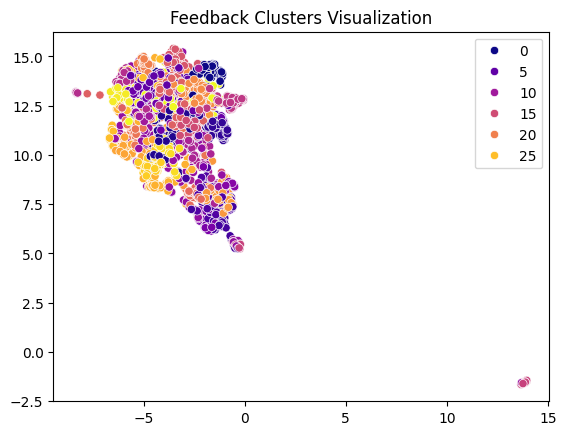

In [65]:
# Reduce dimensions with UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embeddings = reducer.fit_transform(embeddings)

# Plot the clusters
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], hue=clusters, palette='plasma')
plt.title("Feedback Clusters Visualization")
plt.show()

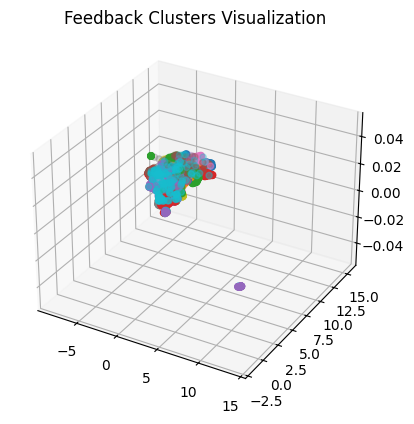

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Setup 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
unique_clusters = np.unique(clusters)

# Plot all points
for cluster in unique_clusters:
    idx = clusters == cluster
    ax.scatter(umap_embeddings[idx, 0], 
               umap_embeddings[idx, 1], 
)

# Annotate 50% of clusters
num_to_annotate = max(1, len(unique_clusters) // 2)  # At least 1 cluster
clusters_to_annotate = random.sample(list(unique_clusters), num_to_annotate)

for cluster in clusters_to_annotate:
    idx = clusters == cluster
    centroid = umap_embeddings[idx].mean(axis=0)  # Average x, y, z
    top_words = get_top_words(df[df['cluster'] == cluster]['feedback'], n_top=3)
    annotation = ', '.join(top_words)
    ax.text(centroid[0], centroid[1], centroid[1], annotation, fontsize=8)

ax.set_title("Feedback Clusters Visualization")
plt.show()

# Surgery ALertws

# Surgery Alerrts

In [103]:
data = pd.read_csv('../ai_medreview/data/data.csv')

In [107]:
data.tail(40)

,time,rating,free_text,do_better,surgery,pcn,sentiment_free_text,sentiment_score_free_text,sentiment_do_better,sentiment_score_do_better,...,emotion_free_text,emotion_do_better,free_text_PER,do_better_PER,campaing_id,logic,campaign_rating,campaign_freetext,free_text_qa,do_better_qa
12720,2025-02-20 19:24:57,Very good,The handling and response was very good,NaN,Kensington-Park-Medical-Centre,Brompton-Health-PCN,positive,0.924370,neutral,0.000000,...,admiration,NaN,NaN,NaN,nhs_app24,Yes,3.0,NaN,"{'score': 1.039585276885191e-05, 'start': 0, '...",NaN
12721,2025-02-20 19:27:46,Neither good nor poor,I did not go to the surgery because I am house...,NaN,The-Abingdon-Medical-Practice,Brompton-Health-PCN,neutral,0.551040,neutral,0.000000,...,neutral,NaN,NaN,NaN,nhs_app24,Yes,2.0,NaN,"{'score': 0.03174585849046707, 'start': 41, 'e...",NaN
12722,2025-02-20 20:42:17,Very good,NaN,NaN,Earls-Court-Medical-Centre,Brompton-Health-PCN,neutral,0.000000,neutral,0.000000,...,NaN,NaN,NaN,NaN,nhs_app24,Yes,5.0,Thanks,NaN,NaN
12723,2025-02-20 20:43:41,Very good,NaN,NaN,Earls-Court-Medical-Centre,Brompton-Health-PCN,neutral,0.000000,neutral,0.000000,...,NaN,NaN,NaN,NaN,nhs_app24,Yes,5.0,Thanks,NaN,NaN
12724,2025-02-20 21:34:13,Very good,NaN,NaN,Kensington-Park-Medical-Centre,Brompton-Health-PCN,neutral,0.000000,neutral,0.000000,...,NaN,NaN,NaN,NaN,nhs_app24,Yes,3.0,I will go and ask receptionist to help me.,NaN,NaN
12725,2025-02-21 14:47:55,Very good,I needed to be seen by GP and was given a same...,NaN,Kensington-Park-Medical-Centre,Brompton-Health-PCN,positive,0.928937,neutral,0.000000,...,admiration,NaN,['Kamvari'],NaN,nhs_app24,No,0.0,NaN,"{'score': 0.0007292783702723682, 'start': 2, '...",NaN
12726,2025-02-21 16:57:15,Good,The reception staff are friendly and understan...,Yes to be able to get early appointment to see...,Emperors-Gate-Health-Centre,Brompton-Health-PCN,positive,0.932355,positive,0.725425,...,admiration,approval,NaN,NaN,nhs_app24,Yes,3.0,NaN,"{'score': 7.111528975656256e-05, 'start': 0, '...","{'score': 0.08832131326198578, 'start': 4, 'en..."
12727,2025-02-21 18:26:29,Very good,The receptionist kindly booked me an appointme...,NaN,Kensington-Park-Medical-Centre,Brompton-Health-PCN,positive,0.974972,neutral,0.000000,...,gratitude,NaN,NaN,NaN,nhs_app24,No,0.0,NaN,"{'score': 0.0006430715438909829, 'start': 106,...",NaN
12728,2025-02-21 18:51:34,Very good,NaN,NaN,Kensington-Park-Medical-Centre,Brompton-Health-PCN,neutral,0.000000,neutral,0.000000,...,NaN,NaN,NaN,NaN,nhs_app24,Yes,4.0,No,NaN,NaN
12729,2025-02-23 08:17:49,Don't know,It is too long to make a telephone appointment...,NaN,Emperors-Gate-Health-Centre,Brompton-Health-PCN,negative,0.658969,neutral,0.000000,...,neutral,NaN,NaN,NaN,nhs_app24,Yes,5.0,NaN,"{'score': 3.7322697608033195e-05, 'start': 0, ...",NaN
